In [14]:
#Reference : https://towardsdatascience.com/predicting-stock-prices-using-a-keras-lstm-model-4225457f0233
#This reference has been very helpful for implementing a LSTM on AMD Stock Prices

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#fname = r"C:\Users\Varad Deshpande\Desktop\DS203 Project\ds203_tech_stocks\BigTech\\AMDtrain.csv"
dataset_train = pd.read_csv('AMDtrain.csv')
training_set = dataset_train.iloc[:, 1:2].values


dataset_train.head()

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

#appending X_train and Y_train
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

#adding Hidden Layers
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=20,batch_size=32)


#fname1 = r"C:\Users\Varad Deshpande\Desktop\DS203 Project\ds203_tech_stocks\BigTech\\AMDtest.csv"
df = pd.read_csv('AMDtest.csv')
dataset_test = df
real_stock_price = dataset_test.iloc[:, 1:2].values


dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 216):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)#predicted



Epoch 1/20
62/62 [==============================] - 16s 129ms/step - loss: 4.7047e-04
Epoch 2/20
62/62 [==============================] - 8s 130ms/step - loss: 1.1602e-04
Epoch 3/20
62/62 [==============================] - 8s 130ms/step - loss: 1.0682e-04
Epoch 4/20
62/62 [==============================] - 8s 132ms/step - loss: 9.2146e-05
Epoch 5/20
62/62 [==============================] - 8s 134ms/step - loss: 9.0011e-05
Epoch 6/20
62/62 [==============================] - 8s 133ms/step - loss: 8.1808e-05
Epoch 7/20
62/62 [==============================] - 8s 132ms/step - loss: 6.8671e-05
Epoch 8/20
62/62 [==============================] - 8s 132ms/step - loss: 7.8261e-05
Epoch 9/20
62/62 [==============================] - 8s 133ms/step - loss: 7.5257e-05
Epoch 10/20
62/62 [==============================] - 8s 133ms/step - loss: 7.2434e-05
Epoch 11/20
62/62 [==============================] - 8s 131ms/step - loss: 6.6079e-05
Epoch 12/20
62/62 [==============================] - 9s 140ms/

5/5 [==============================] - 2s 37ms/step


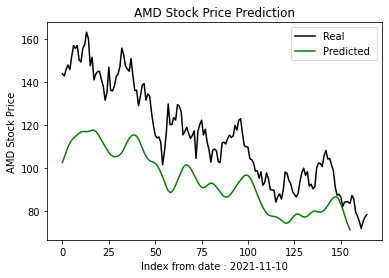

In [18]:
#fname3 = r"C:\Users\Varad Deshpande\Desktop\DS203 Project\ds203_tech_stocks\BigTech\\AMDcompare.csv"
#making the plots
df3 = pd.read_csv('AMDtest.csv')


plt.plot(df3['Open'], color = 'black', label = 'Real')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted ')
plt.title('AMD Stock Price Prediction')
plt.xlabel('Index from date : 2021-11-10')
plt.ylabel('AMD Stock Price')
plt.legend()
plt.show()
